# Zindi: CGIAR Crop Damage Competion Challenge-Ongoing

In [ ]:
#Importing relevant packages
import os
import numpy as np
import keras
import pandas as pd
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.compat.v2 as tf
import tensorflow.compat.v2.keras as keras
tf.enable_v2_behavior()
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
# image processing
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data,dropout, fully_connected
from tflearn.layers.estimator import regression
from keras.layers import Activation, Dense, Flatten,BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [105]:
import keras
tf.random.set_seed(812)

In [33]:
!pip install tflearn==0.5.0

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

train['damage'].unique()

train= train[train["damage"]=='other']
train.shape

test.head()

od='/Users/kipkemoivincent/Desktop/cgiar-crop-damage-classification-challenge20231201-29880-1s2g3v7/CGFR_Images/Train/'
td='/Users/kipkemoivincent/Desktop/cgiar-crop-damage-classification-challenge20231201-29880-1s2g3v7/CGFR_Images/train_data/other/'


fn_train=train['filename'].to_list()
#fn_test=test['filename'].to_list()

import shutil
for i in range(len(fn_train)):
    shutil.copy2(od+fn_train[i],td+fn_train[i])

import shutil
for i in range(len(fn_test)):
    shutil.copy2(od+fn_test[i],td+fn_test[i])

In [101]:
image_size = (150, 150)
batch_size = 26068
train_ds= keras.preprocessing.image_dataset_from_directory(
    "/Users/kipkemoivincent/Desktop/cgiar-crop-damage-classification-challenge20231201-29880-1s2g3v7/train_data",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)
val_ds= keras.preprocessing.image_dataset_from_directory(
    "/Users/kipkemoivincent/Desktop/cgiar-crop-damage-classification-challenge20231201-29880-1s2g3v7/train_data",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 26068 files belonging to 5 classes.
Using 20855 files for training.
Found 26068 files belonging to 5 classes.
Using 5213 files for validation.


In [3]:
Test_ds= keras.preprocessing.image_dataset_from_directory(
    "/Users/kipkemoivincent/Desktop/cgiar-crop-damage-classification-challenge20231201-29880-1s2g3v7/T_data",seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 8663 files belonging to 1 classes.


In [4]:
file_paths = Test_ds.file_paths
Test_fn=[]
for i in range(len(file_paths)):
    Test_fn.append(file_paths[i][113:])

In [5]:
@tf.function
def input_fn():
    dataset = tf.data.TFRecordDataset(filenames = filenames)
    
    dataset = dataset.map(_parse_function)
    iterator = iter(dataset)
    next_element = iterator.get_next()
    return next_element

plt.figure(figsize=(15, 15))
for images, labels in train_ds:
    labels=[int(labels[i]) for i in range(len(labels))]
    for i in range(len(labels)):
        if int(labels[i])==1:
            labels[i]='DR'
        elif int(labels[i])==2:
            labels[i]='G'
        elif int(labels[i])==3:
            labels[i]='NR'
        elif int(labels[i])==4:
            labels[i]='other'
        else:
            labels[i]='WR'
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(labels[i])
        plt.axis("off")

In [6]:
X_train1=[]
y_train1=[]
X_test1=[]
y_test1=[]
for images, labels in train_ds:
    X_train1.append(images)
    y_train1.append(labels)
for images, labels in val_ds:
    X_train1.append(images)
    y_train1.append(labels)

In [7]:
Test1=[]
for images, labels in Test_ds:
    Test1.append(images)

In [8]:
Test=np.array(Test1[0])
Test=Test.astype('float32')

In [9]:
import numpy as np
X_train=np.array(X_train1[0])
X_test=np.array(X_train1[1])
y_train=np.array(y_train1[0])
y_test=np.array(y_train1[1])
#X_train=X_train.reshape(4800,67500)
#X_test=X_test.reshape(1200,67500)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [131]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 883, 2314,   49,  103, 1864]))

In [130]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([3633, 9309,  223,  316, 7374]))

In [10]:
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from imblearn.over_sampling import SMOTE
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution

X_train.shape

!pip install -U threadpoolctl

from imblearn.over_sampling import RandomOverSampler
X_train = X_train.reshape(20855,67500)
oversample = RandomOverSampler()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train.shape

X_train = X_train.reshape(-1,150,150,3)

X_train.shape

## Normalizing the data to help with the training

In [11]:
X_train /= 255
X_test /= 255

In [12]:
Test/=255

from flaml import AutoML
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'log_loss',
    "task": 'classification'
}
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

In [13]:
y_train1=y_train
y_test1=y_test
Y_train=tf.keras.utils.to_categorical(y_train1, num_classes=5)
Y_test=tf.keras.utils.to_categorical(y_test1, num_classes=5)

In [14]:
Y_train.shape

(20855, 5)

# CNN1 (with Keras)

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), 
                 padding='valid', activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(5, activation='softmax'))
Optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Optimizer)

# training the model for 10 epochs
history =model.fit(X_train, Y_train, batch_size=2, epochs=4, validation_data=(X_test, Y_test))

In [106]:
def Model():
    inputs = keras.layers.Input(shape=(150, 150, 3))

    x = keras.layers.Conv2D(32, (3,3), padding='same')(inputs)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(2, strides=2)(x)

    x = keras.layers.Conv2D(32,(3,3), padding='same')(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(2, strides=2)(x)

    x = keras.layers.Conv2D(32,(3,3), padding='same')(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(2, strides=2)(x)

    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dropout(0.1)(x)
  
    outputs = keras.layers.Dense(5, activation='softmax')(x)


    return keras.models.Model(inputs=inputs, outputs=outputs)
keras.backend.clear_session()
model = Model()
model.compile('Adam', 'categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [108]:
# training the model for 10 epochs
history =model.fit(X_train, Y_train, batch_size=1,epochs=40, validation_data=(X_test, Y_test))

Train on 20855 samples, validate on 5213 samples
Epoch 1/40
20855/20855 [==============================] - 713s 34ms/sample - loss: 1.1208 - accuracy: 0.4440 - val_loss: 1.0807 - val_accuracy: 0.4650
Epoch 2/40
20855/20855 [==============================] - 1050s 50ms/sample - loss: 1.0488 - accuracy: 0.4872 - val_loss: 1.0717 - val_accuracy: 0.4483
Epoch 3/40
20855/20855 [==============================] - 938s 45ms/sample - loss: 0.9894 - accuracy: 0.5471 - val_loss: 0.9718 - val_accuracy: 0.5958
Epoch 4/40
20855/20855 [==============================] - 817s 39ms/sample - loss: 0.9536 - accuracy: 0.5756 - val_loss: 0.9379 - val_accuracy: 0.5786
Epoch 5/40
20855/20855 [==============================] - 1000s 48ms/sample - loss: 0.9374 - accuracy: 0.5850 - val_loss: 0.9102 - val_accuracy: 0.6165
Epoch 6/40
20855/20855 [==============================] - 874s 42ms/sample - loss: 0.9221 - accuracy: 0.5966 - val_loss: 0.9649 - val_accuracy: 0.5782
Epoch 7/40
20855/20855 [===================

In [109]:
score = model.evaluate(X_test, Y_test, verbose=0)
# summarize model.
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 61.81%


In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred_p=model.predict(X_test)
y_pred = np.argmax(y_pred_p, axis=1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 662   92    0    0  129]
 [ 255 1184    0    0  875]
 [  32    7    0    0   10]
 [  21   36    0    0   46]
 [ 186  302    0    0 1376]]
              precision    recall  f1-score   support

           0       0.57      0.75      0.65       883
           1       0.73      0.51      0.60      2314
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00       103
           4       0.56      0.74      0.64      1864

    accuracy                           0.62      5213
   macro avg       0.37      0.40      0.38      5213
weighted avg       0.62      0.62      0.61      5213



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

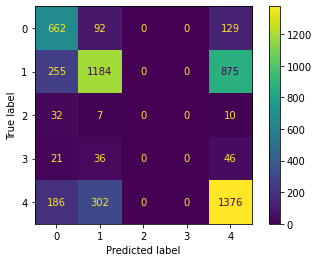

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4])
disp.plot()


# Saving model

In [118]:
from keras import models
from numpy import loadtxt
from tensorflow.keras.models import save_model
save_model(model, "model1.h5")
# load and evaluate a saved model
loaded_model = models.load_model('model1.h5')
# summarize model.
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
tf_op_layer_Relu (TensorFlow (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
tf_op_layer_Relu_1 (TensorFl (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0     

In [138]:
model=loaded_model
train_pred_p=model.predict(X_train)
train_pred = np.argmax(train_pred_p, axis=1)
train_pred 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


array([0, 4, 4, ..., 1, 1, 4])

In [140]:
print(confusion_matrix(y_train, train_pred))

[[2798  401    0    0  434]
 [ 948 4992    0    0 3369]
 [ 146   31    0    0   46]
 [  51  123    0    3  139]
 [ 663 1199    0    0 5512]]


In [ ]:
X

In [134]:
test_pred_p=model.predict(X_test)
test_pred = np.argmax(test_pred_p, axis=1)
test_pred 

array([1, 1, 1, ..., 1, 1, 1])

In [119]:
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
# summarize model.
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


accuracy: 61.81%


# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=30,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.3, # Randomly zoom image 10%
        width_shift_range=0.3,  # randomly shift images horizontally 10%
        height_shift_range=0.4,  # randomly shift images vertically 10%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(X_train)

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

model=Sequential()      
Pre_trained_model= ResNet50(include_top=False, weights='imagenet', 
                            pooling='avg',classes=5,input_shape=(150,150,3))
for layer in Pre_trained_model.layers:
    layer.trainable=False
model.add(Pre_trained_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax')) 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.001))

model.fit(X_train, Y_train, batch_size=24,
                        validation_data=(X_test, Y_test),
                        epochs=10)

from sklearn.metrics import log_loss
Pred=model.predict(X_test)
Loss=log_loss(Pred,Y_test)

In [120]:
Pred.shape,Y_test.shape

((8663, 5), (5213, 5))

In [121]:
pred=model.predict(Test)

In [123]:
keys=Test_fn
values=pred
my_dict = dict(zip(keys, values))
sub=pd.read_csv('test.csv')
filenames=sub['filename'].to_list()
Pred1=[my_dict[filenames[i]] for i in range(len(filenames))]

Pred=pd.DataFrame(data=Pred1, columns=['DR','G','ND','other','WD'])
submission = pd.concat([sub, Pred], axis=1)
columns=['ID','DR','G','ND','WD','other']
submission=submission[columns]
# Create submission csv file csv file
submission.to_csv('submission5.csv', index = False)

submission.head()

,ID,DR,G,ND,WD,other
0,ID_QW9GQM,0.663280,0.161265,5.029074e-02,0.117644,7.519532e-03
1,ID_G9VPQ9,0.895024,0.099911,1.679032e-06,0.005064,7.742774e-11
2,ID_QIMIEM,0.021352,0.953264,8.458109e-12,0.025384,1.323434e-10
3,ID_TSINUQ,0.000115,0.985767,2.105870e-21,0.014118,6.537254e-16
4,ID_I7OOHH,0.009630,0.427475,1.124914e-08,0.534736,2.815915e-02
